# Week 9 handin

## week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

___
# Status

Alle opgaver er gennemført.

___
## Exercise 1

In [18]:
#imports

import csv
import requests as req
import pandas as pd 
import numpy as np
import io
from sklearn import preprocessing

___
#### Download the data:
- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

In [19]:
#Solution 1

Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
File = 'files/carsCSV.csv'

def download(url,file):
    try:
        r = req.get(url)
        r.raise_for_status()
        with open(file, 'w') as f:
            #print(r.text)
            f.write(r.text)
    except req.exceptions.HTTPError as e:
        print(e.response.text)
    except FileNotFoundError:
        print("File not found, jerk!")
        
download(Data,File)

In [124]:
#Solution 2
url = "https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv"
s = req.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df
#df.head(0)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


___
#### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)

In [125]:
#Reducing to Honda & Gasoline
df1 = df.loc[(df['Identification.Make'] == 'Honda') & (df['Fuel Information.Fuel Type'] == 'Gasoline')]

#Removing outliers
df2 = df1.loc[(df1['Engine Information.Engine Statistics.Horsepower'] < df1['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)) & 
(df1['Fuel Information.Highway mpg'] < df1['Fuel Information.Highway mpg'].quantile(0.90))]

#Reducing dataset to two features
df3 = df2[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]


#Normalizing our data
##Using sklearning.preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df3)
scaled_df = pd.DataFrame(d, columns=df3.columns)

##Mathematical expression
df4=( (df3-df3.min()) / (df3.max() - df3.min()) )

scaled_df.head()
df4

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
102,0.733333,0.548872
103,0.733333,0.548872
104,0.733333,0.548872
106,0.733333,0.548872
107,0.733333,0.548872
...,...,...
5067,0.333333,1.000000
5068,0.266667,1.000000
5069,0.333333,1.000000
5070,0.266667,1.000000


___
#### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

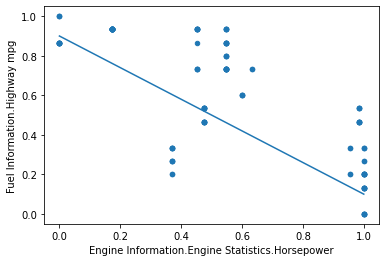

In [126]:
import matplotlib.pyplot as plt
df4.plot.scatter(x=1, y=0)

#Best Guess
plt.plot([1,0], [0.1,0.9])

In [115]:
import sklearn
import sklearn.linear_model

xs = df4['Fuel Information.Highway mpg']
ys = df4['Engine Information.Engine Statistics.Horsepower']

xs_reshape = np.array(xs).reshape(-1, 1)

model = sklearn.linear_model.LinearRegression()
refitted_model = model.fit(xs_reshape, ys)


#Koeficienten er hældningen på vores graf. Den fortæller hvordan y-aksen udvikler sig i forhold til x-aksens værdi.
refitted_model.coef_

array([-0.78514958])

In [24]:
#Hvis x = 0, skærer grafen hvor y = intercept. 
refitted_model.intercept_

1.0229952323711924

-0.5473039292160449


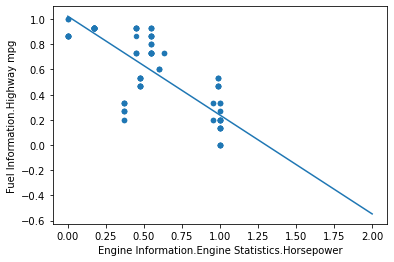

In [123]:
predicted = model.predict(xs_reshape)

#x værdi
target = 2
hpPrediction = model.predict([[target]])
print('{}'.format(hpPrediction[0]))
#predicted

df4.plot.scatter(x=1, y=0)
plt.plot([0,target], [1.0229952323711924,hpPrediction[0]])